Before checking the results and the data, here are some possible situations when the results are not ideal and looks skeptical:

Experiment doesnt make sense.

Population is skewed. The experiment needs to be redone.

We dont have enough population or have too much population so that minimal differences are detected.

The trend over time changes over time and that contains some further info.

It could be caused by the novel effect. Customers are not used to the changes when the changes just made.

Other potential situations need to be investigated.

In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype, is_categorical_dtype

test_data=pd.read_csv('test_table.csv')
user_data=pd.read_csv('user_table.csv')

test_data.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [2]:
user_data.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [3]:
test_data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [4]:
user_data.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


## profiling

In [5]:
pop=pd.merge(test_data, user_data, how='left',on='user_id')
control=pop[pop.test==0]
control=control[control.country!='Spain']
target=pop[pop.test==1]

In [6]:
len(control)

185556

In [7]:
len(target)

215983

In [8]:
import scipy.stats as ss 
# from scipy.stats import norm

ss.ttest_ind(target['conversion'],control['conversion'])

Ttest_indResult(statistic=-7.422512095954769, pvalue=1.15144687852198e-13)

In [9]:
# function to report the target/control ratio
# pop: the total population
# group: target or control. group=1 represents the target group
def report1(pop,group):
    for i in pop.columns:
        if not is_numeric_dtype(pop[i]):
            # print(is_numeric_dtype(pop[i]))
            hist=pop.groupby([group])[i].value_counts().reset_index(name='count')
            print(hist)
            rate=pd.DataFrame({i:hist[i].unique(),'rate':hist[hist[group]==1]['count'].reset_index()['count']/hist[hist[group]==0]['count'].reset_index()['count']})
            rate.plot(x=i,y='rate', kind='bar')
            

   test        date  count
0     0  2015-12-04  73907
1     0  2015-12-03  52073
2     0  2015-11-30  37142
3     0  2015-12-01  37116
4     0  2015-12-02  37100
5     1  2015-12-04  67256
6     1  2015-12-03  47420
7     1  2015-11-30  33883
8     1  2015-12-01  33875
9     1  2015-12-02  33549
   test  source  count
0     0     Ads  95348
1     0     SEO  94250
2     0  Direct  47740
3     1     Ads  86529
4     1     SEO  86360
5     1  Direct  43094
   test  device   count
0     0     Web  131938
1     0  Mobile  105400
2     1     Web  119627
3     1  Mobile   96356
   test browser_language   count
0     0               ES  197773
1     0               EN   33003
2     0            Other    6562
3     1               ES  179774
4     1               EN   30134
5     1            Other    6075
   test ads_channel  count
0     0    Facebook  35789
1     0      Google  35771
2     0       Yahoo  14399
3     0        Bing   7174
4     0       Other   2215
5     1    Facebook  32636
6 

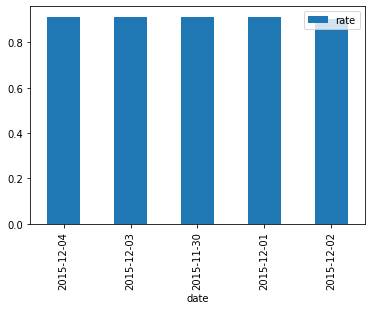

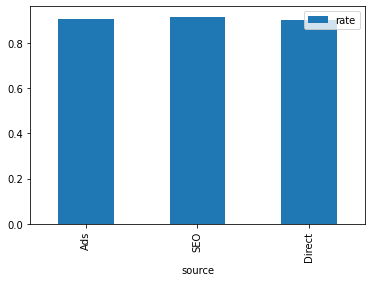

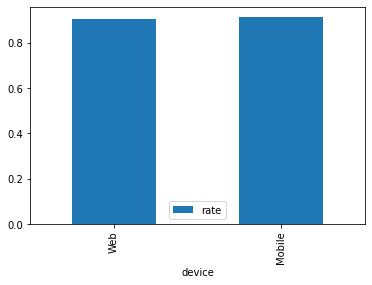

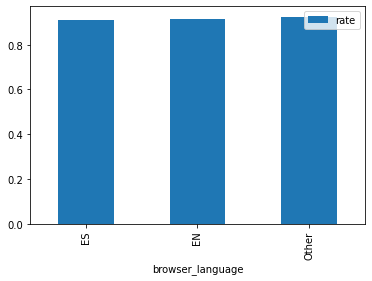

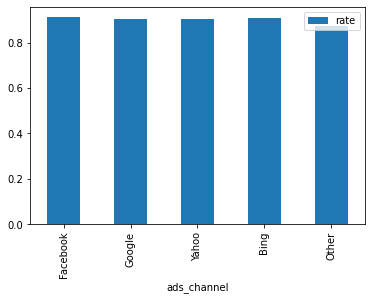

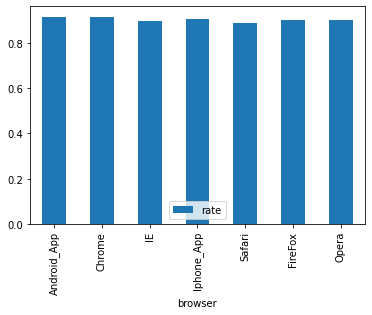

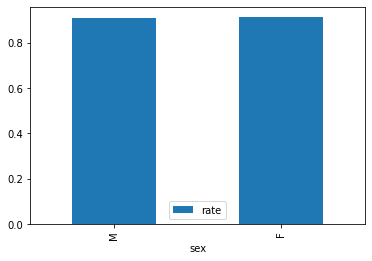

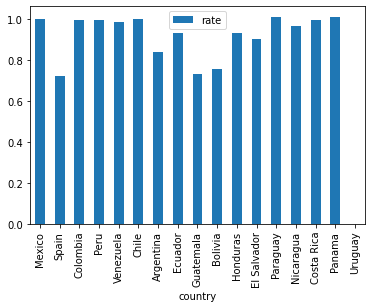

In [10]:
report1(pop,group='test')

In [11]:
# function to report the frequency for the target & control
# pop: the total population
# group: target or control. group=1 represents the target group
def report2(pop,group):
    for i in pop.columns:
        if not is_numeric_dtype(pop[i]):
            hist=pop.groupby([group])[i].value_counts().reset_index(name='count')
            hist['index']=hist[i]+'-'+hist[group].astype(str)
            hist.plot(x='index', y='count', kind='bar')


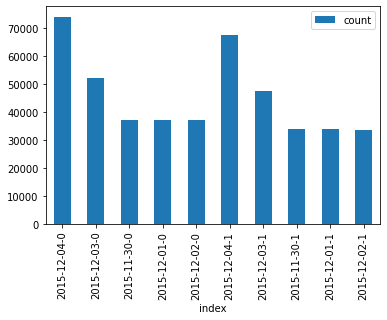

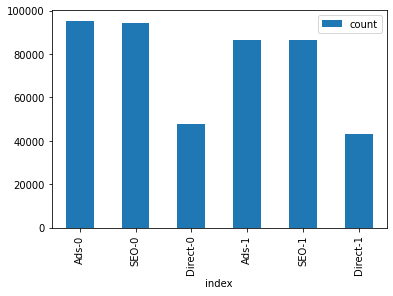

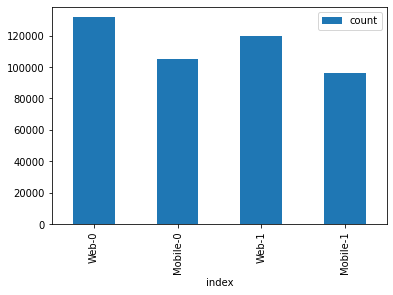

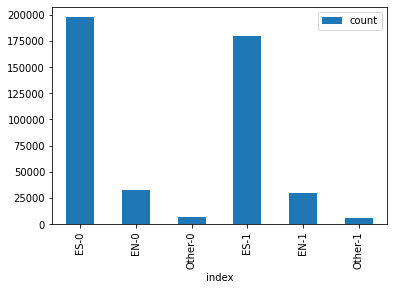

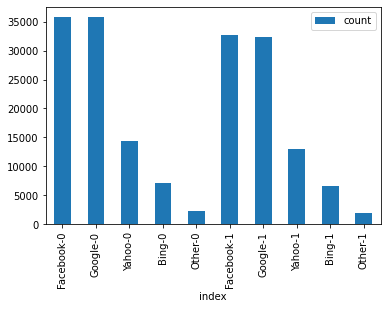

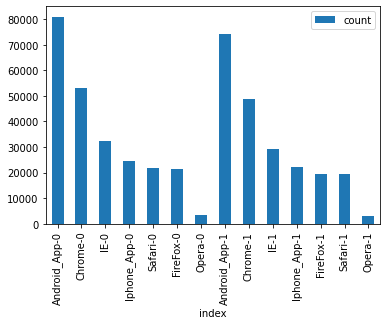

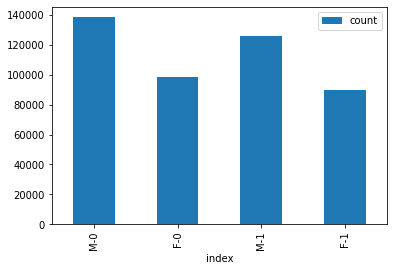

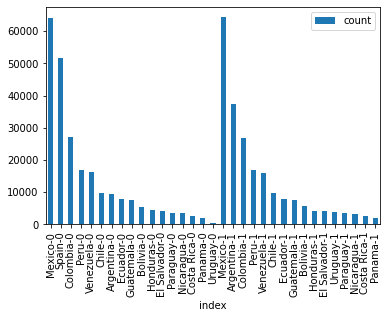

In [12]:
report2(pop, group='test')

## Randomization check

In [13]:
hist=pop.groupby(['test'])['country'].value_counts().reset_index(name='count')
ss.ttest_ind(hist[hist.test==0]['count'],hist[hist.test==1]['count'])

Ttest_indResult(statistic=0.07597529868023353, pvalue=0.939926958904807)

In [14]:
hist=pop.groupby(['test'])['sex'].value_counts().reset_index(name='count')
ss.ttest_ind(hist[hist.test==0]['count'],hist[hist.test==1]['count'])

Ttest_indResult(statistic=0.3955692290980914, pvalue=0.7306293429825332)

In [15]:
hist=pop.groupby(['test'])['browser'].value_counts().reset_index(name='count')
ss.ttest_ind(hist[hist.test==0]['count'],hist[hist.test==1]['count'])

Ttest_indResult(statistic=0.23226389750523774, pvalue=0.8202469538438488)

In [16]:
hist=pop.groupby(['test'])['ads_channel'].value_counts().reset_index(name='count')
ss.ttest_ind(hist[hist.test==0]['count'],hist[hist.test==1]['count'])

Ttest_indResult(statistic=0.1838893783468971, pvalue=0.8586757920853237)

In [17]:
hist=pop.groupby(['test'])['browser_language'].value_counts().reset_index(name='count')
ss.ttest_ind(hist[hist.test==0]['count'],hist[hist.test==1]['count'])

Ttest_indResult(statistic=0.08808442645511833, pvalue=0.934043249879031)

In [18]:
hist=pop.groupby(['test'])['device'].value_counts().reset_index(name='count')
ss.ttest_ind(hist[hist.test==0]['count'],hist[hist.test==1]['count'])

Ttest_indResult(statistic=0.6050267284322417, pvalue=0.6066656019458753)

In [19]:
hist=pop.groupby(['test'])['source'].value_counts().reset_index(name='count')
ss.ttest_ind(hist[hist.test==0]['count'],hist[hist.test==1]['count'])

Ttest_indResult(statistic=0.33372316952899483, pvalue=0.7553501279919747)

In [20]:
hist=pop.groupby(['test'])['date'].value_counts().reset_index(name='count')
ss.ttest_ind(hist[hist.test==0]['count'],hist[hist.test==1]['count'])

Ttest_indResult(statistic=0.4376295950463429, pvalue=0.6732293591893522)

In [21]:
control.head(20)

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35.0,Mexico
9,10427,2015-12-04,Ads,Mobile,ES,Facebook,Android_App,0,0,F,33.0,Mexico
10,8343,2015-11-30,Ads,Mobile,ES,Bing,Android_App,1,0,M,37.0,Colombia
13,234023,2015-12-03,SEO,Web,ES,NaN,Chrome,0,0,F,19.0,El Salvador
14,207018,2015-12-03,Ads,Web,ES,Google,Chrome,0,0,F,28.0,Mexico
15,103879,2015-11-30,Direct,Mobile,ES,NaN,Iphone_App,0,0,M,27.0,Nicaragua
18,464816,2015-12-01,Direct,Web,ES,NaN,FireFox,0,0,F,28.0,Mexico
22,913301,2015-11-30,Direct,Mobile,ES,NaN,Iphone_App,0,0,F,45.0,Peru
23,833933,2015-11-30,SEO,Web,ES,NaN,FireFox,0,0,M,24.0,Mexico
24,601150,2015-12-03,Ads,Web,ES,Google,Chrome,0,0,M,23.0,Mexico


Conclusion:

The bias is caused by the country randomization. Customers in Argentina and Uruguay are not balanced well between target and control. Although the test result shows that the target group has the negative lift but that cannot be trusted because the population is skewed. To launch a reliable experiment, randomization check is necessary during the experiment. If that doesnt work, the experiment result cannot be used and the redesign is required.

Things I didnt consider but I should have:

while join tables(test and population info), whether there are duplicates or missings?? which join makes more sense. The left join works 90% of the time but that doesnt mean analysis is not required. (for example, checking the summary(data),len(data1)-len(data2),dupes(data1), etc.)

Does spain works better than the other countries?? Easy but necessary to check

plot the target vs control convertion rate day by day to check the trend. Should be easy but effective.


Useful comments:

**In data science, whenever results appear too bad or too good to be true, they are not true.**